### OASIS INFOBYTE DATA SCIENCE INTERNSHIP

Task 3 : Sales Prediction Using Python

Author: Anish S

## Aim:
To predict the sales using the TV, Radio and Newspaper add


## Description of each column:

TV: amount of money spent on TV advertising (in thousands of dollars)

Radio: amount of money spent on radio advertising (in thousands of dollars)

Newspaper: amount of money spent on newspaper advertising (in thousands of dollars)

Sales: sales of a product (in thousands of units)

In [79]:
#Importing Libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [54]:
# Reading the dataset

df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [56]:
# DATA PREPROCESSING

Here, The Attribute "Unnamed:0" has no meaning full data, So, let's drop that column

In [57]:
df = df.drop('Unnamed: 0',axis = 1)

In [58]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [60]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

So, There is no missing values present in the dataset

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


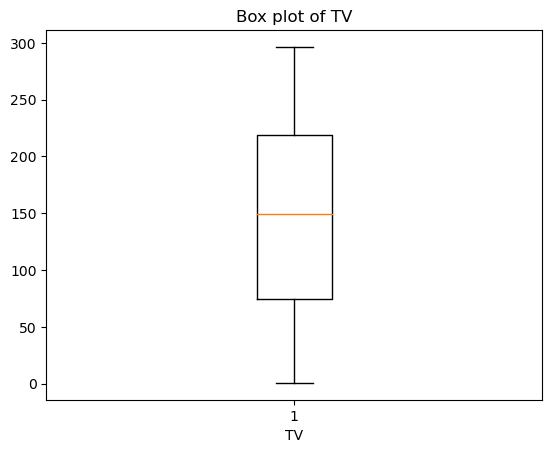

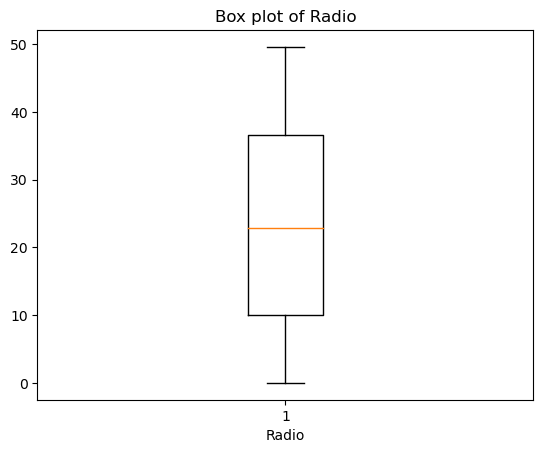

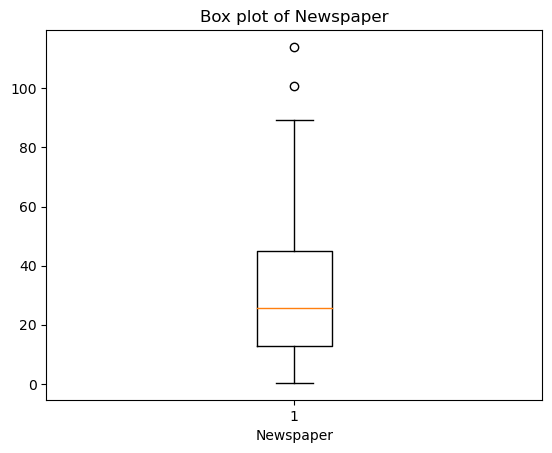

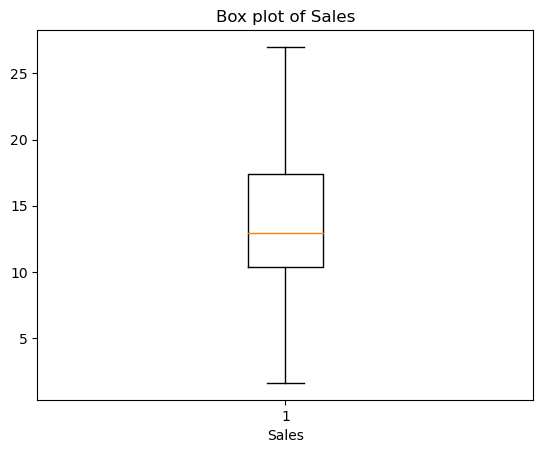

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Select only the numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Create a box plot for each numeric column
for col in numeric_cols:
    plt.boxplot(df[col], showfliers=True)
    plt.title('Box plot of {}'.format(col))
    plt.xlabel(col)
    plt.show()

In [66]:
# Select only the numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Define a function to find the outliers in a column
def find_outliers(col):
    q1 = np.percentile(col, 25)
    q3 = np.percentile(col, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = np.where((col < lower_bound) | (col > upper_bound))[0]
    return outliers

# Find the outliers in each numeric column
outliers = {}
for col in numeric_cols:
    col_outliers = find_outliers(df[col])
    if len(col_outliers) > 0:
        outliers[col] = col_outliers

# Print the rows and columns of the outliers
if len(outliers) > 0:
    print('Outliers found:')
    for col, rows in outliers.items():
        print('Column "{}": Rows {}'.format(col, rows))
else:
    print('No outliers found.')

Outliers found:
Column "Newspaper": Rows [ 16 101]


In [67]:
df.iloc[[16,101]]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [68]:
#We have to check the data is pottential outliers or not 

It is not a pottential outlier because spending 114.0 and 100 to advertise in newspaper is common

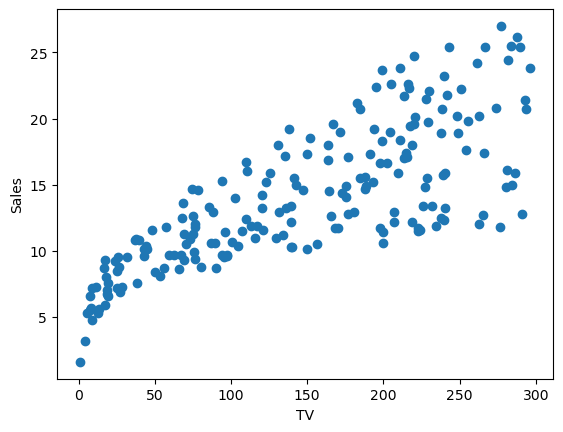

In [80]:
import matplotlib.pyplot as plt

plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

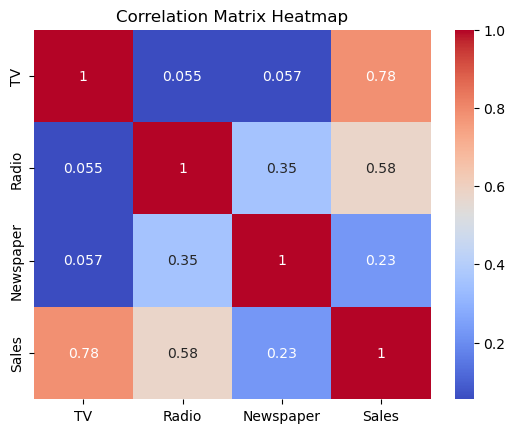

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [90]:
import plotly.express as px

fig = px.scatter_3d(data_frame=df, x='TV', y='Radio', z='Newspaper', color='Sales')
fig.show()

In [87]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [91]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('R-squared:', r2)
print('MSE:', mse)

# Use the trained model to make predictions on new input data
while True:
    try:
        tv = float(input("Enter TV advertising budget: "))
        radio = float(input("Enter radio advertising budget: "))
        newspaper = float(input("Enter newspaper advertising budget: "))
        break
    except ValueError:
        print("Invalid input, please enter a number.")

X_new = [[tv, radio, newspaper]]   # New input data
y_new = model.predict(X_new)
print('Predicted sales:', y_new[0])

R-squared: 0.8994380241009121
MSE: 3.1740973539761024
Enter TV advertising budget: 100
Enter radio advertising budget: 100
Enter newspaper advertising budget: 50
Predicted sales: 26.509580225500265


## THANK YOU!!!

BY 
Anish S